### Data
cli.022 Populations in Coastal Zones <br>
https://resourcewatch.carto.com/u/wri-rw/dataset/cli_022_populations_in_coastal_zones <br>

In [1]:
import numpy as np
import vega
import json
from vega import Vega

### Resource Watch specification
API ID: 2974f221-58bd-474e-955f-954ff94f4194 <br>
https://resourcewatch.org/embed/widget/2974f221-58bd-474e-955f-954ff94f4194

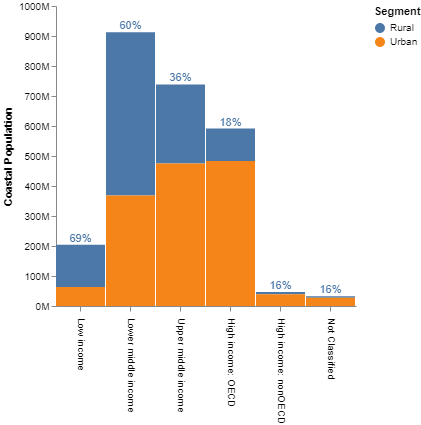

In [2]:
specV3=json.loads("""
{
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT data.incomegroup AS x, SUM(data.rural_population_data) AS rural_population, SUM(data.urban_population_data) AS urban_population FROM cli_022_populations_in_coastal_zones data WHERE EXTRACT(YEAR FROM datetime)=2010 GROUP BY data.incomegroup ORDER BY incomegroup!='Low income',incomegroup!='Lower middle income',incomegroup!='Upper middle income',incomegroup!='High income: OECD',incomegroup!='High income: nonOECD',incomegroup!='Not classified'",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "fold",
          "as": [
            "c",
            "y"
          ],
          "fields": [
            "rural_population",
            "urban_population"
          ]
        },
        {
          "type": "formula",
          "as": "fraction_rural",
          "expr": "datum.c=='rural_population' ? format(datum.rural_population / (datum.rural_population+datum.urban_population)*100,'.2r')+'%' : ''"
        },
        {
          "type": "formula",
          "as": "c",
          "expr": "replace(upper(slice(datum.c,0,1))+slice(datum.c,1,5),/_/g,' ')"
        },
        {
          "type": "stack",
          "groupby": [
            "x"
          ],
          "sort": {
            "field": "c",
            "order": "descending"
          },
          "field": "y"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "band",
      "range": "width",
      "domain": {
        "data": "table",
        "field": "x"
      }
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": true,
      "zero": true,
      "domain": {
        "data": "table",
        "field": "y1"
      }
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": "category",
      "domain": [
        "Rural",
        "Urban"
      ]
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "x",
      "zindex": 1,
      "labelOverlap": "parity",
      "labelPadding": 6,
      "encode": {
        "labels": {
          "update": {
            "angle": {
              "value": 90
            },
            "align": {
              "value": "left"
            },
            "baseline": {
              "value": "middle"
            }
          }
        }
      }
    },
    {
      "title": "Coastal Population",
      "orient": "left",
      "scale": "y",
      "zindex": 0,
      "labelOverlap": "parity",
      "format": "g",
      "encode": {
        "labels": {
          "update": {
            "text": {
              "signal": "(datum.value/1000000)+'M'"
            }
          }
        }
      }
    }
  ],
  "marks": [
    {
      "name": "bars",
      "type": "rect",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "x": {
            "scale": "x",
            "field": "x"
          },
          "width": {
            "scale": "x",
            "band": 1,
            "offset": -1
          },
          "y": {
            "scale": "y",
            "field": "y0"
          },
          "y2": {
            "scale": "y",
            "field": "y1"
          },
          "fill": {
            "scale": "color",
            "field": "c"
          }
        },
        "update": {
          "fillOpacity": {
            "value": 1
          }
        },
        "hover": {
          "fillOpacity": {
            "value": 0.5
          }
          
        }
      }
    },
    {
      "type": "text",
      "from": {
        "data": "bars"
      },
      "encode": {
        "enter": {
          "x": {
            "field": "x",
            "offset": {
              "field": "width",
              "mult": 0.5
            }
          },
          "y": {
            "field": "y",
            "offset": {
              "value": -6
            }
          },
          "fill": {
            "scale": "color",
            "value": "Rural"
          },
          "align": {
            "value": "center"
          },
          "baseline": {
            "value": "middle"
          },
          "text": {
            "field": "datum.fraction_rural"
          }
        }
      }
    }
  ],
  "legends": [
    {
      "title": "Segment",
      "fill": "color",
      "orient": "right"
    }
  ],
  "interaction_config": [
    {
      "name": "tooltip",
      "config": {
        "fields": [
          {
            "column": "y",
            "property": "Population",
            "type": "number",
            "format": ".2s"
          },
          {
            "column": "c",
            "property": "Segment",
            "type": "string"
          },
          {
            "column": "x",
            "property": "Income Group",
            "type": "string"
          }
        ]
      }
    }
  ]
}
""")
vega4view=dict(specV3)
vega4view['width']=300
vega4view['height']=300
Vega(vega4view)

### Stand-alone specification
(eg for use with https://vega.github.io/editor/#/)

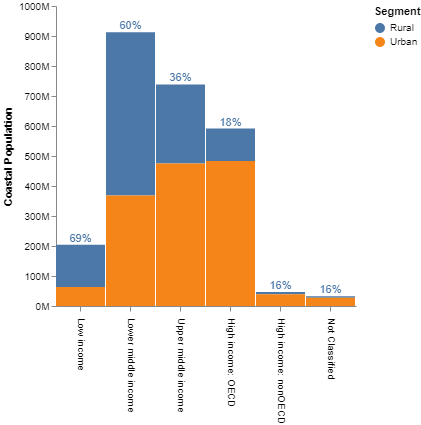

In [3]:
specV3=json.loads("""
{
  "width": 300,
  "height": 300,
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT data.incomegroup AS x, SUM(data.rural_population_data) AS rural_population, SUM(data.urban_population_data) AS urban_population FROM cli_022_populations_in_coastal_zones data WHERE EXTRACT(YEAR FROM datetime)=2010 GROUP BY data.incomegroup ORDER BY incomegroup!='Low income',incomegroup!='Lower middle income',incomegroup!='Upper middle income',incomegroup!='High income: OECD',incomegroup!='High income: nonOECD',incomegroup!='Not classified'",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "fold",
          "as": [
            "c",
            "y"
          ],
          "fields": [
            "rural_population",
            "urban_population"
          ]
        },
        {
          "type": "formula",
          "as": "fraction_rural",
          "expr": "datum.c=='rural_population' ? format(datum.rural_population / (datum.rural_population+datum.urban_population)*100,'.2r')+'%' : ''"
        },
        {
          "type": "formula",
          "as": "c",
          "expr": "replace(upper(slice(datum.c,0,1))+slice(datum.c,1,5),/_/g,' ')"
        },
        {
          "type": "stack",
          "groupby": [
            "x"
          ],
          "sort": {
            "field": "c",
            "order": "descending"
          },
          "field": "y"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "band",
      "range": "width",
      "domain": {
        "data": "table",
        "field": "x"
      }
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": true,
      "zero": true,
      "domain": {
        "data": "table",
        "field": "y1"
      }
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": "category",
      "domain": [
        "Rural",
        "Urban"
      ]
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "x",
      "zindex": 1,
      "labelOverlap": "parity",
      "labelPadding": 6,
      "encode": {
        "labels": {
          "update": {
            "angle": {
              "value": 90
            },
            "align": {
              "value": "left"
            },
            "baseline": {
              "value": "middle"
            }
          }
        }
      }
    },
    {
      "title": "Coastal Population",
      "orient": "left",
      "scale": "y",
      "zindex": 0,
      "labelOverlap": "parity",
      "format": "g",
      "encode": {
        "labels": {
          "update": {
            "text": {
              "signal": "(datum.value/1000000)+'M'"
            }
          }
        }
      }
    }
  ],
  "marks": [
    {
      "name": "bars",
      "type": "rect",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "x": {
            "scale": "x",
            "field": "x"
          },
          "width": {
            "scale": "x",
            "band": 1,
            "offset": -1
          },
          "y": {
            "scale": "y",
            "field": "y0"
          },
          "y2": {
            "scale": "y",
            "field": "y1"
          },
          "fill": {
            "scale": "color",
            "field": "c"
          }
        },
        "update": {
          "fillOpacity": {
            "value": 1
          }
        },
        "hover": {
          "fillOpacity": {
            "value": 0.5
          },
          "tooltip": {
            "signal": "{'Population':format(datum.y,',.3r'), 'Segment':datum.c, 'Income Group':datum.x}"
          }
        }
      }
    },
    {
      "type": "text",
      "from": {
        "data": "bars"
      },
      "encode": {
        "enter": {
          "x": {
            "field": "x",
            "offset": {
              "field": "width",
              "mult": 0.5
            }
          },
          "y": {
            "field": "y",
            "offset": {
              "value": -6
            }
          },
          "fill": {
            "scale": "color",
            "value": "Rural"
          },
          "align": {
            "value": "center"
          },
          "baseline": {
            "value": "middle"
          },
          "text": {
            "field": "datum.fraction_rural"
          }
        }
      }
    }
  ],
  "legends": [
    {
      "title": "Segment",
      "fill": "color",
      "orient": "right"
    }
  ]
}
""")
vega4view=dict(specV3)
Vega(vega4view)